In [30]:
# Import necessary libraries

% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

In [48]:
# Setup Data
source_dir = '/Users/jzuniga/Downloads/HCData/'
names = [
    'Smart',
    'Bartley',
    'Aronson',
    'Burns',
    'Barone', # not in Ji's original list
    'Bitler',
    'Power',
    'Ross',
    'Diamond',
    'Trapp',
    'Sports',
    'Eddie',
    'Schule',
    'DAmico',
    'Duffy',
    'Thomas',
    'Hunter',
    'Compeau', # not in Ji's original list
    'Syndicate',
    'Lundin',
    'Simulator',
    'Wilson',
    'Monohan',
    'Vinceletti',
    'Rickenbach',
    'Higgs',
    'Nover',
    'Brown',
    'Karpinski',
    'Rogers'
    ]

df = pd.DataFrame()
for i in range(1,31): 
    tmp_df = pd.read_pickle(source_dir + 'HC' + str(i) + '.gz', compression='gzip')
    
    # if you want the last name of the HC, switch to use names array
    tmp_df['Handicapper'] = 'HC'+str(i)
    df = df.append(tmp_df, ignore_index=True)
    
# Engineer features
dummy_columns = ['League', 'Bet', 'Home', 'Away', 'Type', 'Handicapper']
df_d = pd.get_dummies(df.loc[df.Result=='Win', dummy_columns], columns=dummy_columns)

# Reduce columns
pca = PCA(n_components=20)
df_d_pca = pca.fit_transform(df_d)

# Create Training Set
train_data = df_d_pca[:94400]


# Create Test Set
test_data = df_d_pca[94400:]

In [46]:
# Run clusters on correctly predicted data
kmeans = KMeans(init='k-means++', n_clusters=16, n_init=10)
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,1,'K-means clusters over 2d data')

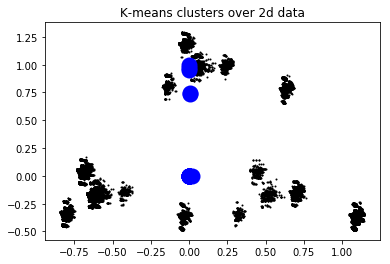

In [49]:
# Plot the data
plt.plot(train_data[:, 0], train_data[:, 1], 'k.', markersize=2)
    
    # Plot the centroids as a blue circles
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=169, linewidths=3,
            color='b', zorder=10)
plt.title('K-means clusters over 2d data')
